In [ ]:
# Support Vector Machine (SVM) Classification Example
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
y = (y == 0).astype(int)  # Convert to binary classification problem

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM model with RBF kernel
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred))

SVM Accuracy: 1.0


In [ ]:
# Linear Regression Example
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Load a sample dataset (California housing dataset)
housing = fetch_california_housing()
x = housing.data
y = housing.target

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
LR = LinearRegression()
ModelLR = LR.fit(x_train, y_train)

# Predict on the test data
PredictionLR = ModelLR.predict(x_test)

# Print the predictions (first 5 for brevity)
print("Predictions (first 5):", PredictionLR[:5])

# Calculate and print the model accuracy
print('===================LR Testing Accuracy================')
teachLR = r2_score(y_test, PredictionLR)
testingAccLR = teachLR * 100
print(f"R² Score: {teachLR}")
print(f"Testing Accuracy: {testingAccLR:.2f}%")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, PredictionLR))
print(f"Root Mean Squared Error: {rmse:.4f}")

Predictions (first 5): [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]
===================LR Testing Accuracy================
R² Score: 0.5757877060324524
Testing Accuracy: 57.58%
Root Mean Squared Error: 0.7456


In [ ]:
# Decision Tree Classifier Example
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load a sample dataset (Breast cancer dataset)
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
DT = DecisionTreeClassifier()

# Train the model
ModelDT = DT.fit(x_train, y_train)

# Model Testing (Prediction)
PredictionDT = DT.predict(x_test)
print("Predictions (first 5):", PredictionDT[:5])

# Model Training Accuracy
print('====================DT Training Accuracy===============')
tracDT = DT.score(x_train, y_train)  # The score method gives accuracy directly
TrainingAccDT = tracDT * 100
print(f"Training Accuracy: {TrainingAccDT:.2f}%")

# Model Testing Accuracy
print('=====================DT Testing Accuracy=================')
teacDT = accuracy_score(y_test, PredictionDT)
testingAccDT = teacDT * 100
print(f"Testing Accuracy: {testingAccDT:.2f}%")

Predictions (first 5): [1 0 0 1 1]
====================DT Training Accuracy===============
Training Accuracy: 100.00%
=====================DT Testing Accuracy=================
Testing Accuracy: 92.98%


Original dataset:
    sq_footage  bedrooms  bathrooms   age neighborhood          price
0  1748.357077         4          3  33.0       Uptown  823220.367420
1  1430.867849         1          3  38.0        Beach  782836.526759
2  1823.844269         3          1  27.0        Beach  709474.870015
3  2261.514928         5          3  34.0        Rural  868190.490954
4  1382.923313         3          3   NaN        Rural  641608.731853

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sq_footage    1000 non-null   float64
 1   bedrooms      1000 non-null   int64  
 2   bathrooms     1000 non-null   int64  
 3   age           950 non-null    float64
 4   neighborhood  1000 non-null   object 
 5   price         1000 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 47.0+ KB
None

Missing Values:
sq_footag

<ipython-input-5-517b98f7c58d>:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)


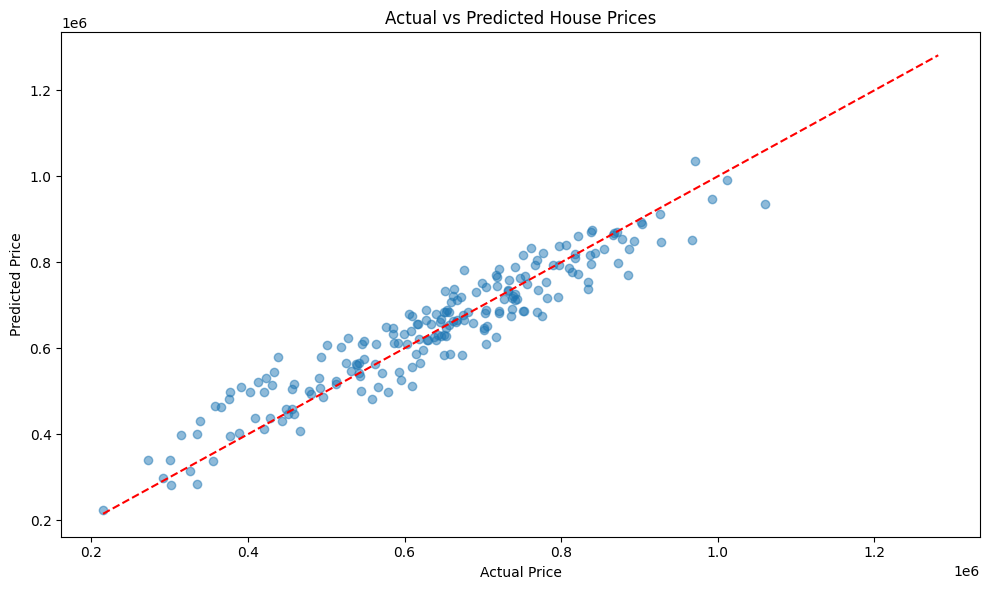


Feature Coefficients (for numeric features):
sq_footage: 198.72
bedrooms: 51713.85
bathrooms: 73695.18
age: -1860.29


In [ ]:
# Task 1 Solution - House Price Prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Create sample dataset for housing data
# In a real scenario, you would load this from a file using pd.read_csv()
np.random.seed(42)

# Create synthetic data
n_samples = 1000
# Features: sq_footage, bedrooms, bathrooms, age, neighborhood
sq_footage = np.random.normal(1500, 500, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
bathrooms = np.random.randint(1, 4, n_samples)
age = np.random.randint(1, 50, n_samples)
# Create 5 different neighborhoods
neighborhoods = np.random.choice(['Downtown', 'Suburb', 'Rural', 'Uptown', 'Beach'], n_samples)

# Create the price based on these features (with some noise)
price = (
    200 * sq_footage +
    50000 * bedrooms +
    75000 * bathrooms -
    2000 * age +
    np.random.normal(0, 50000, n_samples)  # Add noise
)
# Adjust prices based on neighborhood
for i, neighborhood in enumerate(neighborhoods):
    if neighborhood == 'Downtown':
        price[i] += 100000
    elif neighborhood == 'Uptown':
        price[i] += 150000
    elif neighborhood == 'Beach':
        price[i] += 200000

# Create a DataFrame
data = pd.DataFrame({
    'sq_footage': sq_footage,
    'bedrooms': bedrooms,
    'bathrooms': bathrooms,
    'age': age,
    'neighborhood': neighborhoods,
    'price': price
})

# Add some missing values
missing_indices = np.random.choice(range(n_samples), size=50, replace=False)
data.loc[missing_indices, 'age'] = np.nan

# Print the first few rows of the dataset
print("Original dataset:")
print(data.head())

# Step 1: Clean the dataset and handle missing values
print("\nData Information:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

# Fill missing age values with the median age
data['age'].fillna(data['age'].median(), inplace=True)

# Step 2: Identify relevant features
# Let's check the correlation between numeric features and price
numeric_features = ['sq_footage', 'bedrooms', 'bathrooms', 'age']
print("\nCorrelation with price:")
print(data[numeric_features + ['price']].corr()['price'])

# Step 3: Prepare the data for training
# Split features and target
X = data.drop('price', axis=1)
y = data['price']

# Set up preprocessing for categorical variables
categorical_features = ['neighborhood']
numeric_features = ['sq_footage', 'bedrooms', 'bathrooms', 'age']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Create a pipeline with preprocessing and a model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nModel Evaluation:")
print(f"R-squared: {r2:.4f}")
print(f"RMSE: ${rmse:.2f}")
print(f"Average house price: ${y.mean():.2f}")
print(f"RMSE as percentage of average price: {100 * rmse / y.mean():.2f}%")

# Step 5: Predict the price of a new house
new_house = pd.DataFrame({
    'sq_footage': [2200],
    'bedrooms': [4],
    'bathrooms': [2],
    'age': [10],
    'neighborhood': ['Beach']
})

predicted_price = model.predict(new_house)[0]
print(f"\nPredicted price of the new house: ${predicted_price:.2f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

# Feature importance (coefficients for the numeric features)
numeric_coeffs = model.named_steps['regressor'].coef_[:len(numeric_features)]
print("\nFeature Coefficients (for numeric features):")
for feature, coef in zip(numeric_features, numeric_coeffs):
    print(f"{feature}: {coef:.2f}")

Original dataset:
                                       email_content  n_links  email_length  \
0  the review claim urgent urgent report team off...      3.0           133   
1  urgent free urgent team prize win report prize...      4.0           115   
2  a review office office update schedule cash cl...      2.0           135   
3  client document meeting document limited team ...      2.0           149   
4  free schedule money free money cash prize cash...      4.0           131   

   suspicious_sender  is_spam  
0               True        1  
1               True        1  
2              False        0  
3              False        0  
4               True        1  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   email_content      1000 non-null   object 
 1   n_links            950 non-null    float64

<ipython-input-6-9c156eb6ceec>:76: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['n_links'].fillna(data['n_links'].median(), inplace=True)


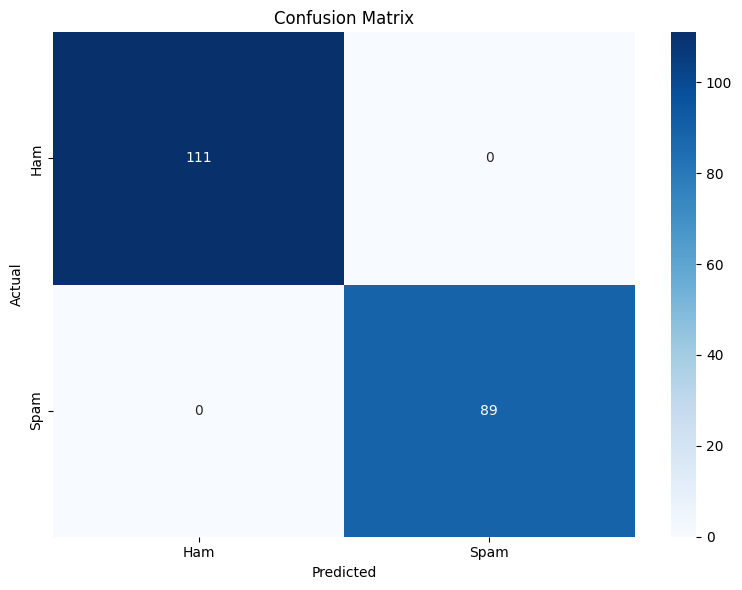


New Email Classification:
Email: 'free money guaranteed win prize now urgent'
Prediction: Spam
Probability of being spam: 1.0000

Email: 'project meeting schedule team report tomorrow'
Prediction: Spam
Probability of being spam: 0.8873

Top 10 most influential features:
urgent: 1.4478
guarantee: 1.2665
prize: 1.1776
team: -1.0368
money: 1.0029
review: -0.9527
office: -0.8872
client: -0.8201
project: -0.7857
meeting: -0.7437


In [ ]:
# Task 2 Solution - Spam Email Classification
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a synthetic email dataset (in a real-world scenario, you would load this from a file)
np.random.seed(42)

# Sample email subjects and words commonly found in spam vs. non-spam
spam_words = ['free', 'win', 'cash', 'prize', 'offer', 'money', 'claim', 'urgent', 'limited', 'guarantee']
ham_words = ['meeting', 'report', 'update', 'project', 'schedule', 'team', 'review', 'office', 'document', 'client']

# Function to generate random emails
def generate_email(is_spam, words_list, other_words_list, length=20):
    # Higher probability of using words from the corresponding category
    prob_same_category = 0.7 if is_spam else 0.8
    email = []
    for _ in range(length):
        if np.random.random() < prob_same_category:
            email.append(np.random.choice(words_list))
        else:
            email.append(np.random.choice(other_words_list + ['the', 'a', 'to', 'and', 'of', 'in', 'with', 'for']))
    return ' '.join(email)

# Generate synthetic emails
n_samples = 1000
emails = []
labels = []

for i in range(n_samples):
    is_spam = np.random.random() < 0.4  # 40% of emails are spam
    if is_spam:
        email = generate_email(True, spam_words, ham_words)
        emails.append(email)
        labels.append(1)  # 1 for spam
    else:
        email = generate_email(False, ham_words, spam_words)
        emails.append(email)
        labels.append(0)  # 0 for ham (not spam)

# Create additional features
n_links = [np.random.randint(0, 10) if labels[i] == 1 else np.random.randint(0, 3) for i in range(n_samples)]
email_length = [len(emails[i]) for i in range(n_samples)]
suspicious_sender = [np.random.random() < 0.8 if labels[i] == 1 else np.random.random() < 0.1 for i in range(n_samples)]

# Create a DataFrame
data = pd.DataFrame({
    'email_content': emails,
    'n_links': n_links,
    'email_length': email_length,
    'suspicious_sender': suspicious_sender,
    'is_spam': labels
})

# Create some missing values
missing_indices = np.random.choice(range(n_samples), size=50, replace=False)
data.loc[missing_indices, 'n_links'] = np.nan

# Print the first few rows of the dataset
print("Original dataset:")
print(data.head())

# Step 1: Clean the dataset and handle missing values
print("\nData Information:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

# Fill missing values with the median
data['n_links'].fillna(data['n_links'].median(), inplace=True)

# Step 2: Prepare data for classification
# Split features and target
X_text = data['email_content']
X_features = data[['n_links', 'email_length', 'suspicious_sender']]
y = data['is_spam']

# Split the data into train and test sets
X_text_train, X_text_test, X_features_train, X_features_test, y_train, y_test = train_test_split(
    X_text, X_features, y, test_size=0.2, random_state=42
)

# Create a pipeline for text processing
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])

# Process the text data
X_text_train_transformed = text_clf.fit_transform(X_text_train)
X_text_test_transformed = text_clf.transform(X_text_test)

# Combine text features with other features
X_train_combined = np.hstack((X_text_train_transformed.toarray(), X_features_train))
X_test_combined = np.hstack((X_text_test_transformed.toarray(), X_features_test))

# Step 3: Train the model
# Create and train the SVM model
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train_combined, y_train)

# Step 4: Evaluate the model
y_pred = clf.predict(X_test_combined)
y_pred_prob = clf.predict_proba(X_test_combined)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Step 5: Classify new emails
new_emails = [
    "free money guaranteed win prize now urgent",
    "project meeting schedule team report tomorrow"
]

# Transform the new emails
X_new_text = text_clf.transform(new_emails)

# Create dummy feature values for the new emails
X_new_features = np.array([
    [5, len(new_emails[0]), 1],  # High number of links, spam-like length, suspicious sender
    [1, len(new_emails[1]), 0]   # Low number of links, normal length, not suspicious sender
])

# Combine text features with other features
X_new_combined = np.hstack((X_new_text.toarray(), X_new_features))

# Predict
new_predictions = clf.predict(X_new_combined)
new_pred_probs = clf.predict_proba(X_new_combined)[:, 1]

print("\nNew Email Classification:")
for i, email in enumerate(new_emails):
    print(f"Email: '{email}'")
    print(f"Prediction: {'Spam' if new_predictions[i] == 1 else 'Ham'}")
    print(f"Probability of being spam: {new_pred_probs[i]:.4f}")
    print()

# Feature importance for the linear SVM
if hasattr(clf, 'coef_'):
    # Get feature names (words from the vectorizer)
    feature_names = text_clf.named_steps['vect'].get_feature_names_out()

    # Combine feature names with the additional features
    all_feature_names = list(feature_names) + ['n_links', 'email_length', 'suspicious_sender']

    # Get coefficients (weights) from the SVM model
    coefficients = clf.coef_[0]

    # Get the top features with the highest absolute coefficients
    top_features = sorted(zip(all_feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)[:10]

    print("Top 10 most influential features:")
    for feature, coef in top_features:
        print(f"{feature}: {coef:.4f}")

Original dataset:
   total_spending        age  num_visits  purchase_frequency  is_high_value
0      599.342831  60.990332           1            0.286877            0.0
1      472.347140  53.869505           1            0.081366            0.0
2      629.537708  40.894456           4            0.258786            0.0
3      804.605971  30.295948           1            0.261974            0.0
4      453.169325  50.473350           3            0.008868            0.0

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_spending      1000 non-null   float64
 1   age                 950 non-null    float64
 2   num_visits          1000 non-null   int64  
 3   purchase_frequency  1000 non-null   float64
 4   is_high_value       1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB
None

Mi

<ipython-input-4-56f66e5a4f19>:69: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)


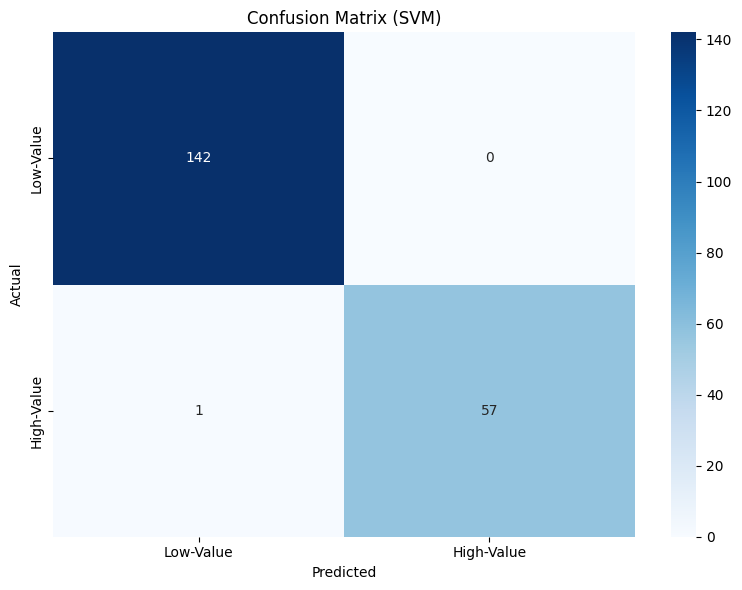


Decision Tree Model Evaluation:
Accuracy: 1.0000

Classification Report (Decision Tree):
              precision    recall  f1-score   support

   Low-Value       1.00      1.00      1.00       142
  High-Value       1.00      1.00      1.00        58

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



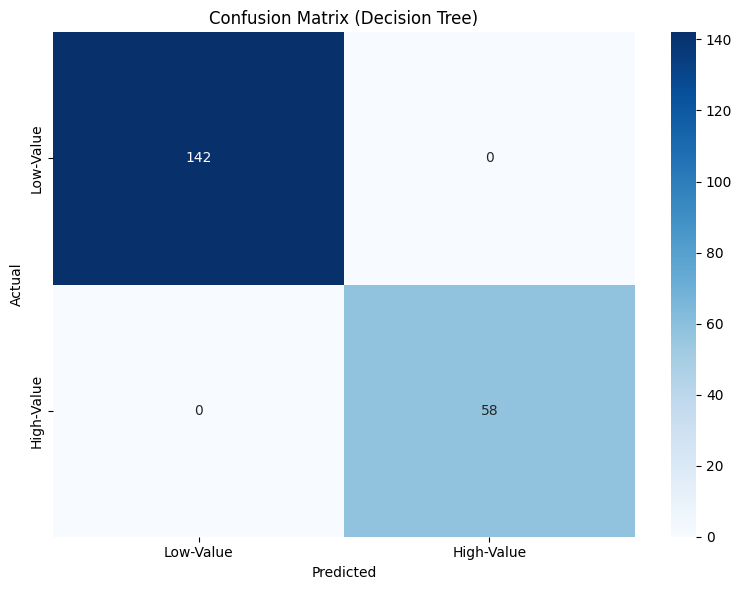

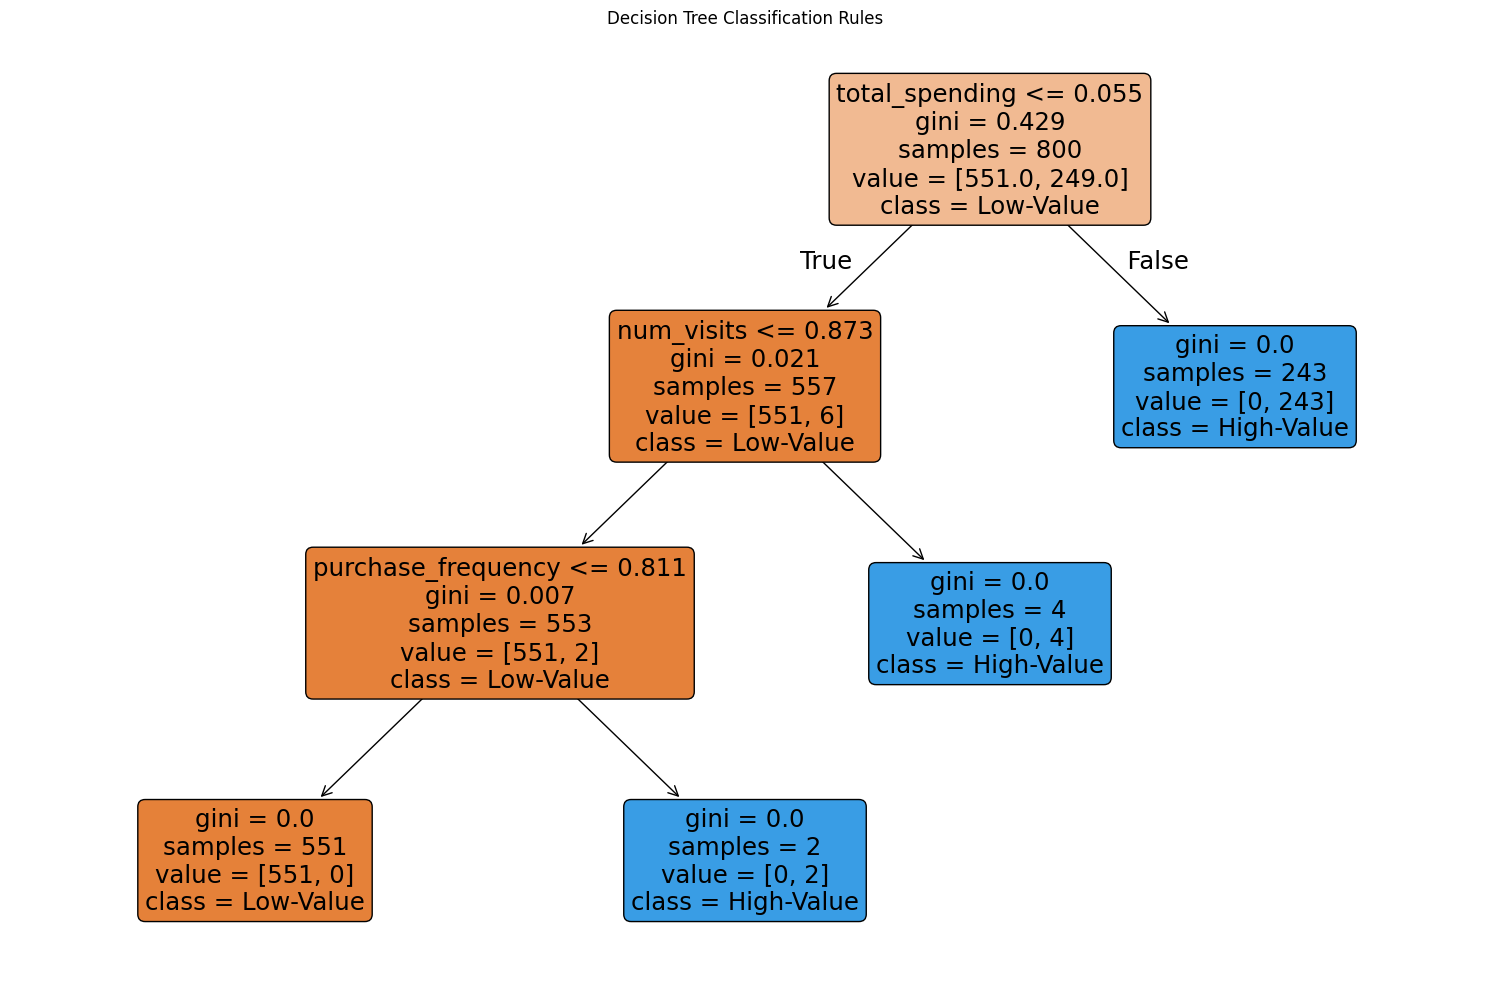


Feature Importance (SVM):
              Feature  Importance
0      total_spending    2.097258
2          num_visits    0.674551
3  purchase_frequency    0.604213
1                 age    0.030388


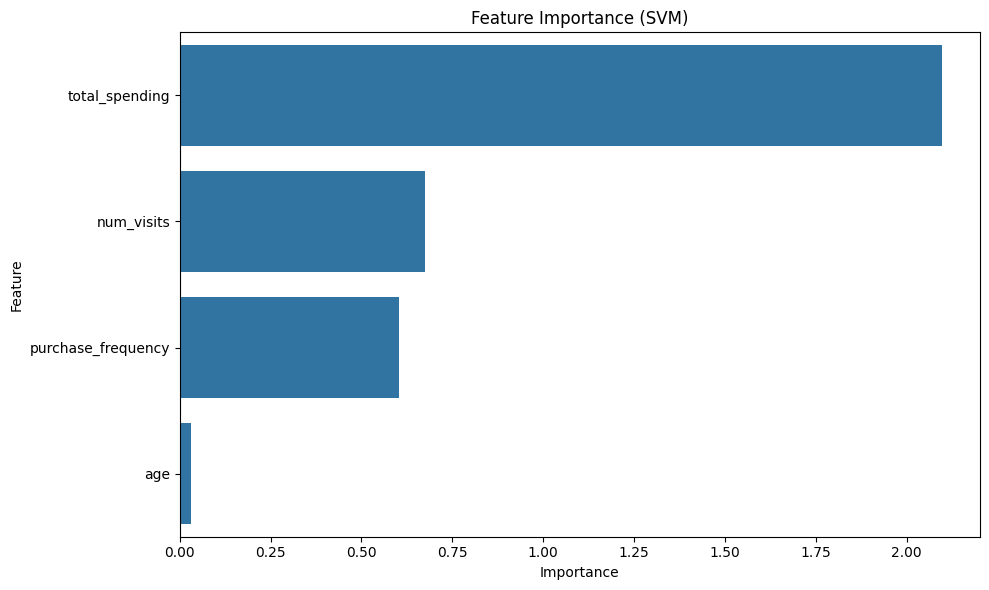


Feature Importance (Decision Tree):
              Feature  Importance
0      total_spending    0.965391
2          num_visits    0.022989
3  purchase_frequency    0.011620
1                 age    0.000000


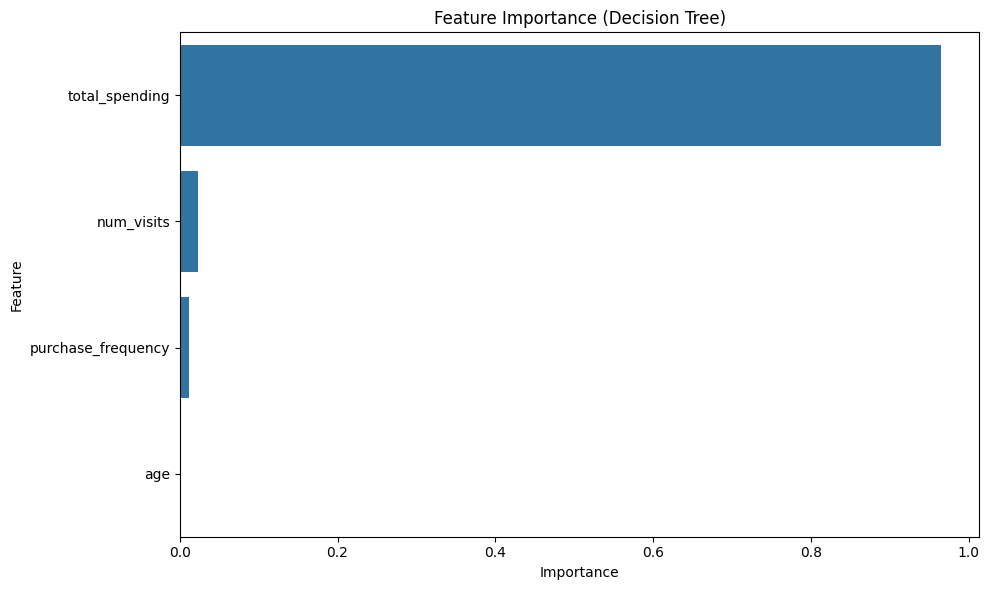


New customer data:
   total_spending  age  num_visits  purchase_frequency
0             300   25           2                 0.1
1            1500   45          12                 0.7
2             800   35           5                 0.3
3            2200   55          15                 0.8

New Customer Classification:
   total_spending  age  num_visits  purchase_frequency SVM_Prediction  \
0             300   25           2                 0.1      Low-Value   
1            1500   45          12                 0.7     High-Value   
2             800   35           5                 0.3      Low-Value   
3            2200   55          15                 0.8     High-Value   

  DT_Prediction  
0     Low-Value  
1    High-Value  
2     Low-Value  
3    High-Value  
Decision Rules:
  if total_spending <= 0.05:
    if num_visits <= 0.87:
      if purchase_frequency <= 0.81:
        class: Low-Value (n_samples: 551, value: 1)
        rules: total_spending <= 0.05 AND num_visits <= 0.

In [ ]:
# Task 3 Solution - Customer Classification (High-Value vs Low-Value)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a synthetic customer dataset (in a real-world scenario, you would load this from a file)
np.random.seed(42)

# Create synthetic data
n_samples = 1000

# Features: total_spending, age, num_visits, purchase_frequency
total_spending = np.concatenate([
    np.random.normal(500, 200, int(n_samples * 0.7)),  # Low-value customers
    np.random.normal(2000, 500, int(n_samples * 0.3))  # High-value customers
])

age = np.random.normal(40, 15, n_samples)
age = np.clip(age, 18, 80)  # Ensure age is between 18 and 80

num_visits = np.concatenate([
    np.random.poisson(3, int(n_samples * 0.7)),  # Low-value customers
    np.random.poisson(10, int(n_samples * 0.3))  # High-value customers
])

purchase_frequency = np.concatenate([
    np.random.normal(0.2, 0.1, int(n_samples * 0.7)),  # Low-value customers
    np.random.normal(0.6, 0.2, int(n_samples * 0.3))  # High-value customers
])
purchase_frequency = np.clip(purchase_frequency, 0, 1)  # Ensure frequency is between 0 and 1

# Create the target variable (0 for low-value, 1 for high-value)
# A customer is high-value if they spend more than 1000 OR have more than 8 visits OR have a purchase frequency above 0.5
y = np.zeros(n_samples)
for i in range(n_samples):
    if (total_spending[i] > 1000 or num_visits[i] > 8 or purchase_frequency[i] > 0.5):
        y[i] = 1

# Create a DataFrame
data = pd.DataFrame({
    'total_spending': total_spending,
    'age': age,
    'num_visits': num_visits,
    'purchase_frequency': purchase_frequency,
    'is_high_value': y
})

# Add some missing values
missing_indices = np.random.choice(range(n_samples), size=50, replace=False)
data.loc[missing_indices, 'age'] = np.nan

# Print the first few rows of the dataset
print("Original dataset:")
print(data.head())

# Step 1: Clean the dataset and handle missing values
print("\nData Information:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

# Fill missing age values with the median age
data['age'].fillna(data['age'].median(), inplace=True)

# Check for outliers
print("\nDataset Statistics:")
print(data.describe())

# Step 2: Prepare the data for training
# Split features and target
X = data.drop('is_high_value', axis=1)
y = data['is_high_value']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Train the SVM model to find a separating hyperplane
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions with SVM
y_pred_svm = svm.predict(X_test)

# Calculate accuracy for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\nSVM Model Evaluation:")
print(f"Accuracy: {accuracy_svm:.4f}")

# Print classification report for SVM
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=['Low-Value', 'High-Value']))

# Create confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low-Value', 'High-Value'],
            yticklabels=['Low-Value', 'High-Value'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.tight_layout()
plt.show()

# Step 4: Train a Decision Tree model to find classification rules
dt = DecisionTreeClassifier(max_depth=3)  # Limit depth for interpretability
dt.fit(X_train, y_train)

# Make predictions with Decision Tree
y_pred_dt = dt.predict(X_test)

# Calculate accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_dt:.4f}")

# Print classification report for Decision Tree
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt, target_names=['Low-Value', 'High-Value']))

# Create confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low-Value', 'High-Value'],
            yticklabels=['Low-Value', 'High-Value'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Decision Tree)')
plt.tight_layout()
plt.show()

# Visualize the decision tree for interpretable rules
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Low-Value', 'High-Value'], rounded=True)
plt.title('Decision Tree Classification Rules')
plt.tight_layout()
plt.show()

# Feature importance for SVM
if hasattr(svm, 'coef_'):
    feature_importance_svm = np.abs(svm.coef_[0])
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_svm})
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

    print("\nFeature Importance (SVM):")
    print(feature_importance_df)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance (SVM)')
    plt.tight_layout()
    plt.show()

# Feature importance for Decision Tree
feature_importance_dt = dt.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_dt})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

print("\nFeature Importance (Decision Tree):")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Decision Tree)')
plt.tight_layout()
plt.show()

# Step 5: Classify new customers
# Create some new customer data
new_customers = pd.DataFrame({
    'total_spending': [300, 1500, 800, 2200],
    'age': [25, 45, 35, 55],
    'num_visits': [2, 12, 5, 15],
    'purchase_frequency': [0.1, 0.7, 0.3, 0.8]
})

print("\nNew customer data:")
print(new_customers)

# Scale the new data
new_customers_scaled = scaler.transform(new_customers)

# Predict with both models
new_predictions_svm = svm.predict(new_customers_scaled)
new_predictions_dt = dt.predict(new_customers_scaled)

# Add predictions to the DataFrame
new_customers['SVM_Prediction'] = ['High-Value' if pred == 1 else 'Low-Value' for pred in new_predictions_svm]
new_customers['DT_Prediction'] = ['High-Value' if pred == 1 else 'Low-Value' for pred in new_predictions_dt]

print("\nNew Customer Classification:")
print(new_customers[['total_spending', 'age', 'num_visits', 'purchase_frequency', 'SVM_Prediction', 'DT_Prediction']])

# Extract decision rules from the tree (text representation)
def get_tree_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != -2 else "undefined!"
        for i in tree_.feature
    ]

    print("Decision Rules:")

    def recurse(node, depth, rules):
        indent = "  " * depth

        if tree_.feature[node] != -2:  # If not a leaf node
            name = feature_name[node]
            threshold = tree_.threshold[node]

            print(f"{indent}if {name} <= {threshold:.2f}:")
            recurse(tree_.children_left[node], depth + 1, rules + [f"{name} <= {threshold:.2f}"])

            print(f"{indent}else:  # if {name} > {threshold:.2f}")
            recurse(tree_.children_right[node], depth + 1, rules + [f"{name} > {threshold:.2f}"])
        else:  # If leaf node
            class_idx = np.argmax(tree_.value[node][0])
            class_name = class_names[class_idx]
            n_samples = tree_.n_node_samples[node]
            value = tree_.value[node][0][class_idx]
            print(f"{indent}class: {class_name} (n_samples: {n_samples}, value: {value:.0f})")
            print(f"{indent}rules: {' AND '.join(rules)}")

    recurse(0, 1, [])

get_tree_rules(dt, X.columns, ['Low-Value', 'High-Value'])